In [1]:
#imports
import arviz as az
from bays_model import BaysModel
from data_manager import DataManager
from doe import DOE
from WoehlerParams import WoehlerCurve
from WoehlerParamsModified import WoehlerCurve2
import plot_functions
import matplotlib.pyplot as plt
import numpy as np
#constants
PARAM_LIST = ['k','s_d', 'n_e','one_t_s']

In [2]:
#loading all data from the files
new_data_manager = DataManager()
#loading the first entry form the ml-prediction entry:
index = 1
#finding the corresponting entry from the database for the experimental data
db_id = new_data_manager.get_db_id_by_index(index)
#loading the data points
n, s_a, outcome = new_data_manager.get_woehler_data_by_db_id(db_id)
curve = WoehlerCurve(s_a, n, outcome)
#the WoehlerParams file uses differnt names for the variables, thus they need to be transformed:
woehler_params_original = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)

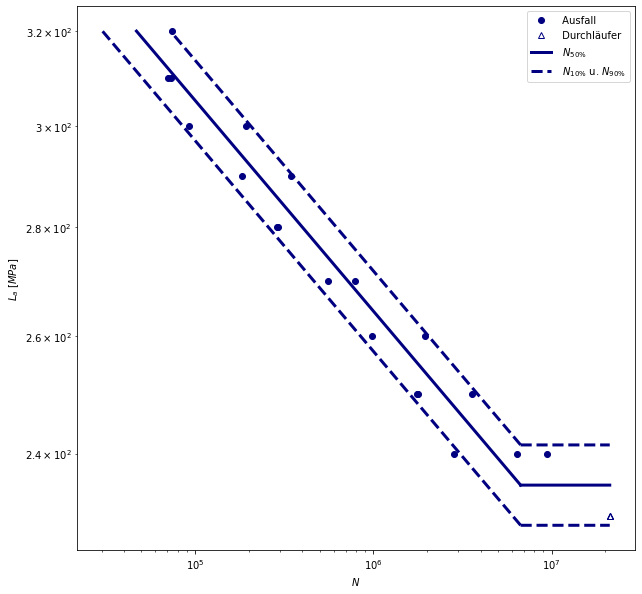

In [3]:
#Plotting the model and the data points
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
woehler_points_original = {}
woehler_points_original['s_a'] = s_a
woehler_points_original['n'] = n
woehler_points_original['outcome'] = outcome
plot_functions.plot_woehler(ax, woehler_points_original)
plot_functions.plot_model(ax, woehler_points_original, woehler_params_original)

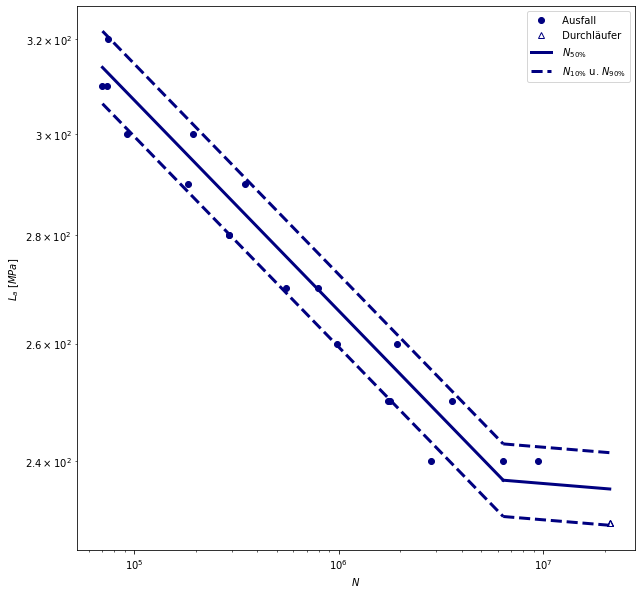

In [4]:
#4-P Model with k_2 specified as in chapter 6.2
k_2 = 200
curve = WoehlerCurve2(s_a, n, outcome, k_2 = k_2)
woehler_params_original = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
woehler_params_original['k_2'] = k_2
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
woehler_points_original = {}
woehler_points_original['s_a'] = s_a
woehler_points_original['n'] = n
woehler_points_original['outcome'] = outcome
plot_functions.plot_woehler(ax, woehler_points_original)
plot_functions.plot_model_2(ax, woehler_points_original, woehler_params_original)